# 数学分析

![image.png](image.png)

制冷功率: $z(t)$ [kw]

制冷设备容量： $Z = \max(z(t))$

储冷量: $c(t)$ [kwh]

储冷设备容量：$C  = \max(c(t))$

储冷功率: $c_p (t) $ [kw] (>0, 储存，用电; <0, 释放，不用电)

需求： $D(t)$ [kwh] 

电费：$P(t)$

费用：$W(t)$


$$D(t) = z(t) - \min(c_p(t),0)$$
$$c(t) = \int c_p(t) \mathrm{d}t$$
$$W =  (\max(c_p(t),0) + z(t)) * P(t)$$

优化目标函数: $$\sum_{t=1}^{24} W(t) + 0.2 Z + 0.05 C $$

![image.png](image2.png)

# 读取数据

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('data.csv')

time = df['time'].values
demand = df['demand'].values
price = df['price'].values

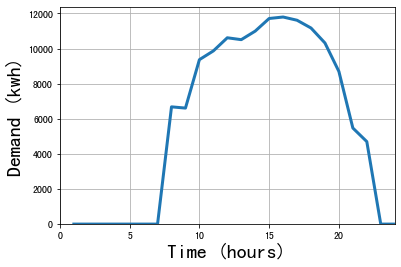

In [17]:
plt.plot(time,demand,lw=3)
plt.xlabel('Time (hours)',fontsize=20)
plt.ylabel('Demand (kwh)',fontsize=20)
plt.xlim(left=0,right=24)
plt.ylim(bottom=0)
plt.grid()

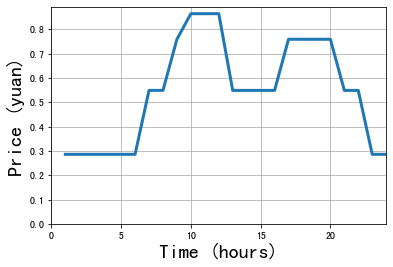

In [18]:
plt.plot(time,price,lw=3)
plt.xlabel('Time (hours)',fontsize=20)
plt.ylabel('Price (yuan)',fontsize=20)
plt.xlim(left=0,right=24)
plt.ylim(bottom=0)
plt.grid()

# 优化

## base case

In [2]:
D = demand
t = time
P = price 

cp = np.zeros_like(t)

z = np.zeros_like(t)
W = np.zeros_like(t)
c = np.zeros_like(t)
for i in range(len(t)):
    z[i] = D[i] + min(0,cp[i])
    W[i] = P[i] * (z[i] + max(cp[i],0))
    c[i] = np.sum(cp[:i+1])
    if c[i] < 0:
        raise ValueError("C[i] should not below zero")

goal = np.sum(W) + 0.2 * np.max(z) + 0.05 * np.max(c)
goal

98927.8

## 梯度下降法

In [3]:
def get_cp(c):
    cp = np.zeros_like(c,dtype=float)
    for i in range(1,len(c)):
        cp[i] = c[i] - c[i-1]
    return cp

def goal(c):
    cp = get_cp(c)
    z = np.zeros_like(c,dtype=float)
    W = np.zeros_like(c,dtype=float)

    for i in range(len(t)):
        z[i] = D[i] + min(0,cp[i])
        W[i] = P[i] * (max(z[i],0) + max(cp[i],0))
    return np.sum(W) + 0.2 * np.max(z) + 0.05 * np.max(c)

import copy
def gradient(c,step=1):
    grad = np.zeros_like(c,dtype=float)
    for i in range(len(c)):
        cnew = copy.deepcopy(c)
        cnew[i] += step
        grad[i] = (goal(cnew) - goal(c)) / step
    return grad

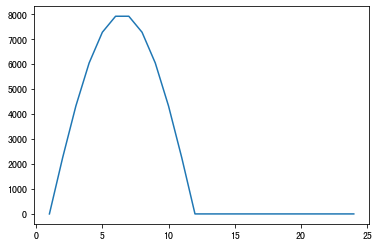

In [38]:
# init
c = np.zeros_like(time)
c[:12] = np.sin(np.linspace(0,np.pi,num=12,endpoint=True)) * 8000
plt.plot(time,c)

goal = 96084.4575085
goal = 94284.08038568904
goal = 92798.78493233015
goal = 91904.66077942666
goal = 91080.69434774872
goal = 90389.29916762763
goal = 89730.61768623702


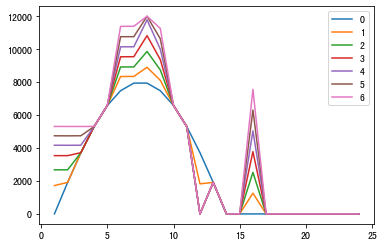

In [37]:
step=1; rate=10; steps=6000

for i in range(steps):
    cnew = np.clip(c - gradient(c,step=step) * rate,0,1.2e4)
    
    if i % 600 == 0:
        print('goal = {}'.format(goal(cnew)))
        plt.plot(time,c,label=repr(i//600))
    c = cnew
    
    cp = get_cp(c)
    if np.max(cp)>1.2e4 or np.min(cp)<-8.e3 or np.min(c) < 0:
        break

plt.legend()


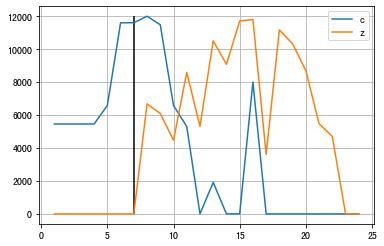

In [35]:
cp = get_cp(c)

for i in range(len(t)):
    z[i] = D[i] + min(0,cp[i])
    
#plt.plot(t,cp,label='cp')
plt.plot(t,cnew,label='c')
plt.plot(t,z,label='z')
plt.legend()
plt.grid()
plt.vlines(7,0,12000)

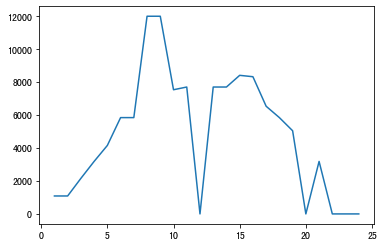

In [25]:
plt.plot(t,c,label='c')

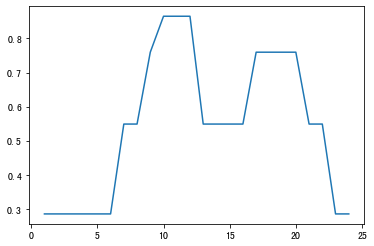

In [23]:
plt.plot(t,price,label='cp')